# **Regression Tree House's Prices**

### **Importing modules**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

### **Create a model that be able to predict the median price of houses for that area so it can be used to make offers.**

 A real estate company is planning to invest in Boston real estate. This is a dataframe with information about various areas of Boston and the task is to create a model that can predict the median price of houses for that area so it can be used to make offers.

The dataset had information on areas/towns not individual houses, the features are

CRIM: Crime per capita

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxides concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to ﬁve Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property-tax rate per $10,000

PTRAIO: Pupil-teacher ratio by town

LSTAT: Percent lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

#### **Reading data**

In [2]:
data = pd.read_csv("data/real_estate_data.csv")

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


#### **Dealing with missing values** 

Using .isna() function to detect missing values. In this case we are summing missing values.

In [4]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

Using .dropna() to drop Rows/Columns with Null values.

In [5]:
data.dropna(inplace=True)

Now there are not missing values

In [7]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

#### **Separate target from our features**

In [6]:
X = data.drop(columns=["MEDV"])
Y = data["MEDV"]

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [9]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

#### **Separate data in Train data and Test sample**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

#### **Create the model of Decision Tree Regressor with the "squared_error" criterion.**

In [27]:
regression_tree_sq_err = DecisionTreeRegressor(criterion = "squared_error")

#### **Train model**

In [28]:
regression_tree_sq_err.fit(X_train, Y_train)

DecisionTreeRegressor()

####  **Score model (R^2)**

In [29]:
round(regression_tree_sq_err.score(X_test, Y_test), 4)

0.8345

The average error in our testing set which is the average error in median home value prediction

In [30]:
prediction = regression_tree_sq_err.predict(X_test)

print(f"$ {round(prediction.mean(),2)*1000}")

print("$",round((prediction - Y_test).abs().mean()*1000, 2))

$ 22060.0
$ 2751.9


#### **Create a new model using "absolute_error"**

In [38]:
regression_tree_abs_err = DecisionTreeRegressor(criterion = "absolute_error")

Train new model

In [39]:
regression_tree_abs_err.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='absolute_error')

Score new model (R^2)

In [40]:
round(regression_tree_abs_err.score(X_test, Y_test), 4)

0.8638

New model obtains a better performance than prior model

In [41]:
prediction = regression_tree_abs_err.predict(X_test)

print("$",round((prediction - Y_test).abs().mean()*1000, 2))

$ 2731.65


In [42]:
prediction = regression_tree_abs_err.predict(X_test)

print(f"$ {round(prediction.mean(),2)*1000}")

$ 21590.0


#### **Testing another criterion of Decision Tree Regressor**

In [43]:
regression_tree_friedman_mse = DecisionTreeRegressor(criterion = "friedman_mse")

regression_tree_poisson = DecisionTreeRegressor(criterion = "poisson")

Training the models

In [44]:
regression_tree_friedman_mse.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [45]:
regression_tree_poisson.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='poisson')

Scoring the models

In [46]:
print(f"Friedman MSE Score (R^2): {regression_tree_friedman_mse.score(X_test, Y_test)}")

print(f"Poisson Score (R^2): {regression_tree_poisson.score(X_test, Y_test)}")

Friedman MSE Score (R^2): 0.7645856265127443
Poisson Score (R^2): 0.8328667166212157


#### **Conclusion**
The model with the best R^2 is the model trained with “absolute error”. It should will the best performance.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

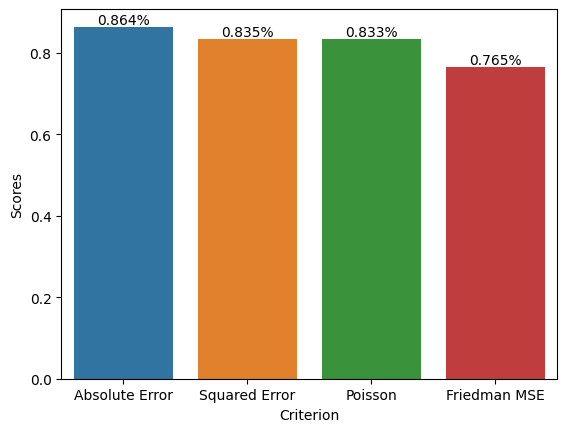

In [48]:
criterion = ["Squared Error","Absolute Error","Friedman MSE","Poisson"]
scores = [regression_tree_sq_err.score(X_test, Y_test), regression_tree_abs_err.score(X_test, Y_test), regression_tree_friedman_mse.score(X_test, Y_test),regression_tree_poisson.score(X_test, Y_test)]

model_score_dict = {"Criterion":criterion, "Scores":scores}

data = pd.DataFrame(model_score_dict)
data_sort = data.sort_values(by=["Scores"], ascending=False)

sns.barplot(data=data_sort, x=data_sort["Criterion"], y=data_sort["Scores"])
for i, v in enumerate(data_sort["Scores"]):
    plt.text(i, v, str(round(v, 3))+'%', verticalalignment='bottom', horizontalalignment='center')
plt.show()